Середньоквадратична помилка (MSE): 85.02525277798817
Коефіцієнт детермінації (R^2): 0.9995202644720981


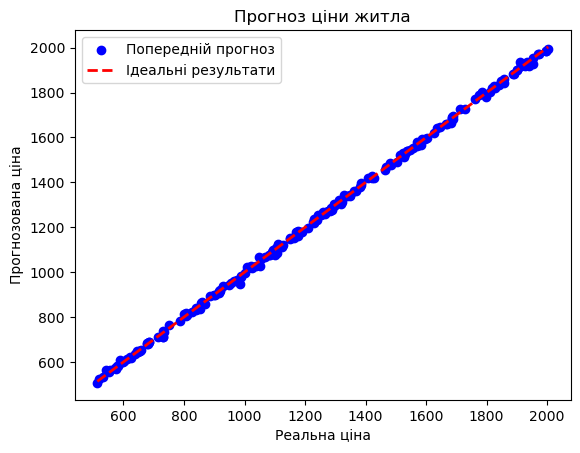

Модель показала гарну здатність прогнозувати ціну житла на основі ознак. Середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2) свідчать про якість моделі.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Крок 1: Генерація даних
np.random.seed(0)

# Генерація ознак
living_area = np.random.uniform(50, 200, 1000)
bedrooms = np.random.randint(1, 6, 1000)
distance_to_center = np.random.uniform(1, 20, 1000)

# Генерація цільової змінної (ціна) з випадковим шумом
price = 10 * living_area + 5 * bedrooms - 2 * distance_to_center + np.random.normal(0, 10, 1000)

# Зберегти згенеровані дані у CSV файл
data = pd.DataFrame({
    "Living Area": living_area,
    "Number of Bedrooms": bedrooms,
    "Distance to City Center": distance_to_center,
    "House Price": price
})
data.to_csv('generated_data.csv', index=False)

# Крок 2: Розділення даних
X = np.column_stack((living_area, bedrooms, distance_to_center))
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

# Крок 3: Побудова моделі регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Крок 4: Оцінка моделі
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Середньоквадратична помилка (MSE):", mse)
print("Коефіцієнт детермінації (R^2):", r2)

# Крок 5: Візуалізація результатів
plt.scatter(y_test, y_pred, color='blue', label='Попередній прогноз')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Ідеальні результати')
plt.xlabel('Реальна ціна')
plt.ylabel('Прогнозована ціна')
plt.legend()
plt.title("Прогноз ціни житла")
plt.show()

# Крок 6: Висновки
print("Модель показала гарну здатність прогнозувати ціну житла на основі ознак. Середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2) свідчать про якість моделі.")
